# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [67]:
import sys

print("Python version")
print(sys.version)


Python version
3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)]


In [68]:
import pandas as pd

### training data
anger_train = pd.read_csv("homework/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("homework/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("homework/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("homework/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [69]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [70]:
### testing data
anger_test = pd.read_csv("homework/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("homework/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("homework/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("homework/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [71]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [72]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


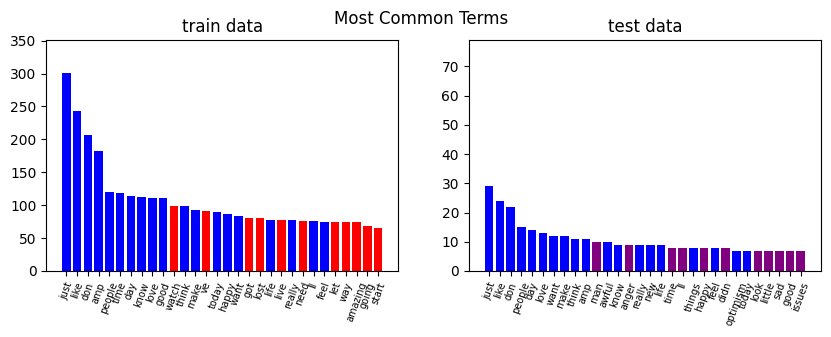

In [128]:
# Answer here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

TERMS_PER_PLOT = 30
count_vect_train = CountVectorizer(stop_words='english')
count_vect_test = CountVectorizer(stop_words='english')

train_counts = count_vect_train.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
test_counts = count_vect_test.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix

term_frequencies_train = np.asarray(train_counts.sum(axis=0))[0]
term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]

bar_df_train = pd.DataFrame(dict(
    term = count_vect_train.get_feature_names_out(),
    count = term_frequencies_train)).sort_values(by="count", ascending=False)

bar_df_test = pd.DataFrame(dict(
    term = count_vect_test.get_feature_names_out(),
    count = term_frequencies_test)).sort_values(by="count", ascending=False)

ylim = bar_df_train["count"].max() + 50
ylim_test = bar_df_test["count"].max() + 50
s1=bar_df_train["term"][:30]
s2=bar_df_test["term"][:30]

set_1_unique_words = set(s1)-set(s2)
set_2_unique_words = set(s2)-set(s1)
colors_s_1 = [("red" if word in set_1_unique_words else "blue") for word in s1]
colors_s_2 = [("purple" if word in set_1_unique_words else "blue") for word in s1]

f = plt.figure(figsize=(10,3))
f.suptitle('Most Common Terms')

ax = f.add_subplot(121)
ax.bar(s1, bar_df_train["count"][:30], color=colors_s_1)
ax.set_title("train data")
ax.set_ylim(0,ylim)
ax.tick_params(axis='x', rotation=70, labelsize= 7)

ax2 = f.add_subplot(122)
ax2.bar(s2, bar_df_test["count"][:30], color=colors_s_2)
ax2.set_title("test data")
ax2.set_ylim(0,ylim_test)
ax2.tick_params(axis='x', rotation=70, labelsize= 7)

plt.show()


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [74]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [75]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [76]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

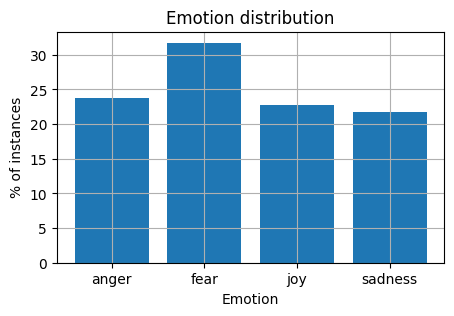

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [80]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [81]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [82]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [83]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [85]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [86]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [87]:
import nltk
# nltk.download('punkt')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [88]:
train_data_BOW_features_500.toarray()

array([[ 1,  1,  0, ...,  0,  0,  0],
       [ 2, 13,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [89]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [90]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [91]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer_1000 = TfidfVectorizer(max_features=1000)
tf_idf_1000 = tf_idf_vectorizer_1000.fit_transform(train_df['text'])
print(tf_idf_vectorizer_1000.get_feature_names_out()[100:110])


['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [93]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'sadness', 'anger', 'sadness', 'anger', 'sadness',
       'anger', 'fear', 'sadness'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [94]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [95]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [96]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [97]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

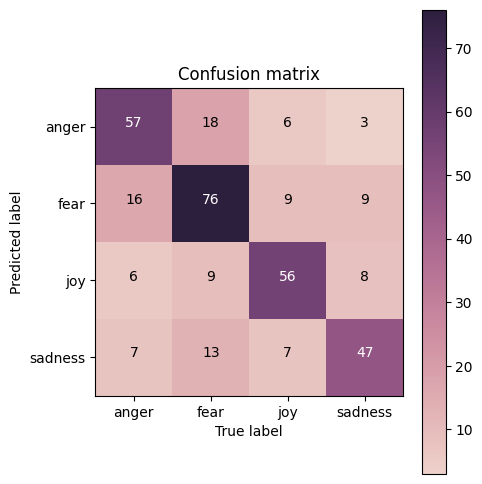

In [98]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [99]:
# Answer here

# The Confusion Matrix shows the distribution of how accurate the training model is across the different labels, which means how many labels were predicted correctly, and ho many were predicted into other labels.
# Based on the matrix, we can see most texts were tagged correctly. The label with the highest accuracy rate would be joy- given it was barely labeled incorrectly.
# In addition, we can see anger/fear labels are confused more often than other labels, followed by sadness/fear incorrect labeling.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

multi_nb train accuracy: 0.79
multi_nb test accuracy: 0.7


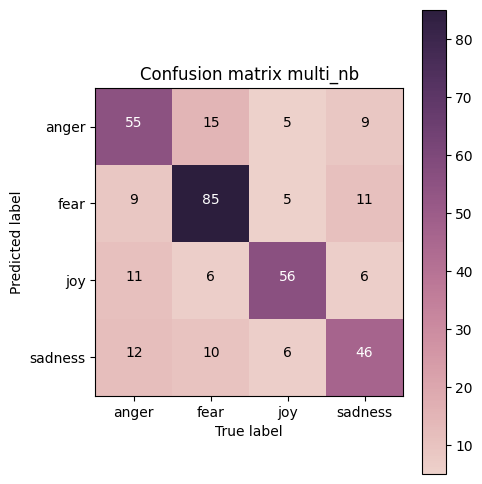

In [100]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(X_train,y_train)

y_train_pred_mnb = multi_nb.predict(X_train)
y_test_pred_mnb = multi_nb.predict(X_test)

acc_train_score = accuracy_score(y_train_pred_mnb, y_train)
acc_test_score = accuracy_score(y_test_pred_mnb, y_test)

print('multi_nb train accuracy:', format(round(acc_train_score, 2)))
print('multi_nb test accuracy:', format(round(acc_test_score, 2)))

plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_test_pred_mnb), classes=my_tags, title='Confusion matrix multi_nb')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [101]:
# Answer here

# TODO: if exercise 4 is optimized, this answer should be updated!

# The accuracy results for the different models are very different:
# For the train data prediction, we are receiving a much lower score (0.79 using multi_nb compared to 0.99 using decision tree). Given the prediction using decision tree was suspiciously high, this isn't neccessarily a bad thing.
# For the test data we receive a bit higher score than before (0.7 using multi_nb compared to 0.68 using decision tree)- which is pretty good news. since there is a lot of data (347 texts in the test dataset), an 0.2 difference could effect overall of almost 7 texts.
# Moreover, since the difference in accuracy between the train_data and test_data is quite small (less than 0.1), we can assume the overfitting issue has been solved (even if the model itself is far from being ideal yet).
# Looking at the confusion matrix visualization, we can see the fear label is better recognized using multi_nb, while the overall label recognition mistakes are less concentrated in one area
# (before, 3 different innacurate groups had over 10 items- 2 of which were in fear/anger recognition.now, there are 5 such groups, with fear/anger still in the first place (by lower margin), and sadness/anger and fear/sadness tying in the second place).

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [102]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)   
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [103]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2094      joy
1689     fear
1909     fear
690     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [104]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [105]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

### 6.4 Train

In [106]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 3ms/step - loss: 1.3337 - accuracy: 0.3537 - val_loss: 1.2717 - val_accuracy: 0.4784
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9840 - accuracy: 0.6543 - val_loss: 0.9114 - val_accuracy: 0.6801
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.8007 - val_loss: 0.8099 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8608 - val_loss: 0.7878 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8882 - val_loss: 0.8622 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.9136 - val_loss: 0.8906 - val_accuracy: 0.7291
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9330 - val_loss: 0.9169 - val_accuracy: 0.7205
Epoch 

### 6.5 Predict on testing data

In [107]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 0s/step


array([[1.25066284e-03, 1.56453780e-06, 9.98743713e-01, 4.02812384e-06],
       [8.21872234e-01, 1.74901664e-01, 1.05104315e-04, 3.12106102e-03],
       [1.17459940e-02, 8.86363011e-07, 1.64685771e-01, 8.23567331e-01],
       [9.77806509e-01, 2.10489854e-02, 7.47258964e-05, 1.06975297e-03],
       [2.10189051e-03, 3.71346772e-01, 7.07774234e-07, 6.26550674e-01]],
      dtype=float32)

In [108]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'sadness', 'anger', 'sadness'], dtype=object)

In [109]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.71


In [110]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.353723,1.333663,0.478386,1.271743
1,1,0.654304,0.983991,0.680115,0.911406
2,2,0.800720,0.565721,0.691643,0.809866
3,3,0.860781,0.397087,0.691643,0.787834
4,4,0.888182,0.308244,0.700288,0.862231
5,5,0.913645,0.253143,0.729107,0.890579
6,6,0.933020,0.201594,0.720461,0.916907
7,7,0.949626,0.166212,0.711816,0.982746
8,8,0.955992,0.143794,0.714697,1.015614
9,9,0.963465,0.127550,0.700288,1.074017


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

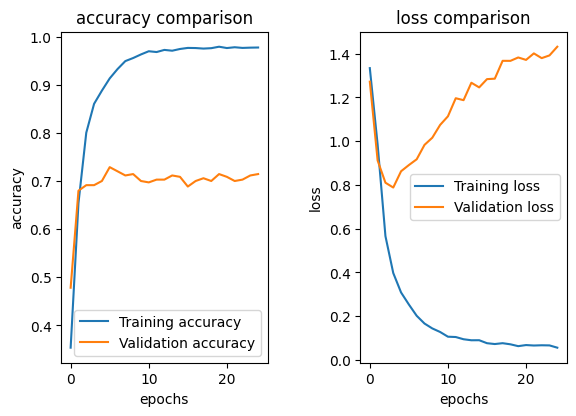

In [111]:
# Answer here

fig = plt.figure()

acc = fig.add_subplot(1, 2, 1)
plt.plot(training_log["accuracy"], label = "Training accuracy") 
plt.plot(training_log["val_accuracy"], label = "Validation accuracy") 
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy comparison")

acc = fig.add_subplot(1, 2, 2)
plt.plot(training_log["loss"], label = "Training loss") 
plt.plot(training_log["val_loss"], label = "Validation loss") 
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss comparison")

plt.tight_layout(pad=3.0)
plt.show()

#Explanations:
#Accuracy comparison: For the first few epochs the model is doing well with both training and validation accuracy going up together. later the validation accuracy gets stuck while the training accuracy keeps on going higher.
#       This shows the model is probably overfitting itself to the training data, getting more accurate for it, but having no improvement for general data (in this case, the validation accuracy.)
#Loss comparison: The training loss is much higher than the validation loss, and so it supports our claims of overfitting.
#       The validation loss gets higher, the training loss gets lower and the overall difference between the two grow as we train the data.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [112]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2094,30090,Thank you disney themed episode for letting me...,"[Thank, you, disney, themed, episode, for, let..."
1689,20832,#picoftheday : How...why... Really... !!\n ...,"[#, picoftheday, :, How, ..., why, ..., Really..."
1909,21052,@mackenzian yes! That was my one qualm. These ...,"[@, mackenzian, yes, !, That, was, my, one, qu..."
690,10690,-- haired man strides close and watches as the...,"[--, haired, man, strides, close, and, watches..."
1177,20320,@carlybigelow13 first you take the room now yo...,"[@, carlybigelow13, first, you, take, the, roo..."


In [113]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Thank', 'you', 'disney', 'themed', 'episode', 'for', 'letting', 'me', 'discover', 'how', 'amazing', 'the', '@', 'BlackishWriters', 'are', '!', '#', 'hilarious']),
       list(['#', 'picoftheday', ':', 'How', '...', 'why', '...', 'Really', '...', '!', '!', '\\n', '#', 'funny', '#', 'picoftheday', '#', 'lol', '#', 'random', '#', 'laugh', '#', 'chair', '#', 'of', '#', 'despair', '#', 'funnypics', '#', 'virgin', '#', 'cafe', '#', 'i', '...']),
       list(['@', 'mackenzian', 'yes', '!', 'That', 'was', 'my', 'one', 'qualm', '.', 'These', 'are', 'deeply', 'theological', 'issues', 'we', "'re", 'engaging', 'theologically', '.'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [114]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [115]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 5.93629181e-01,  8.42443854e-02,  1.46726042e-01,  9.12262592e-03,
       -7.84600452e-02, -1.62130272e+00,  5.37888229e-01,  1.65456605e+00,
       -4.03957337e-01, -5.43700278e-01, -5.09583116e-01, -7.11723506e-01,
       -6.97838187e-01,  4.92576063e-01, -2.53446043e-01, -3.22189569e-01,
        5.26398830e-02, -7.19264030e-01,  4.70059574e-01, -1.11797345e+00,
        6.57503307e-01,  9.91693079e-01,  7.69730330e-01,  4.80551094e-01,
        4.72473741e-01,  7.79806674e-02, -4.99748707e-01,  7.77081549e-01,
       -2.68412739e-01, -1.10587925e-01,  3.61795962e-01, -1.87273175e-01,
        2.00956151e-01, -6.76576614e-01, -2.46718287e-01,  4.33396608e-01,
        5.31759977e-01, -2.02910528e-01, -3.09310824e-01, -8.67272317e-01,
        2.71463454e-01, -1.30274490e-01, -5.22861421e-01,  4.67261821e-02,
        5.05428612e-01, -8.91584307e-02, -9.35044527e-01,  2.42607325e-01,
        1.63809523e-01,  2.95529217e-01, -2.38029465e-01, -7.16356218e-01,
        3.80973816e-01, -

In [116]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('memories😊', 0.9355384707450867),
 ('Be', 0.9234538674354553),
 ('bday', 0.9120513796806335),
 ('smile', 0.9068875312805176),
 ('blessing', 0.906034529209137),
 ('November', 0.9052721858024597),
 ('September', 0.8973907232284546),
 ('cry', 0.8964672088623047),
 ('O', 0.8956598043441772),
 ('ship', 0.8948785662651062)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [117]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "Homework/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [118]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [119]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118191123008728),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902430415153503),
 ('crown_prince', 0.5499458909034729),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [120]:
sentence = "chocolate is the most amazing thing in the world"
VALUE_COUNT = 100

# Chosen Method:
# Summing up the weighted similarity of all most similar words, trying to analyze according to whether there are doubles/most similar word in the group
# According to The Brevity Law, most common words tend to be shorter, which whould mean that "filler words" or words that are common and can have multiple different meanings (and therefore less helpful to understand the sentence's meaning) will also be shorter.
# To go with this law, we'll calculate the weight of the word/it's importance to the sentence as how long it is

# Main issue: if word is not in data, "key is not presented in data" error is returned

stop_words = set(nltk.corpus.stopwords.words('english'))
sent_arr = [w for w in sentence.split() if not w.lower() in stop_words]
total_length = sum(map(len, sent_arr))

df = pd.DataFrame(None, columns =['Name', 'Score'])

for item in sent_arr:
    temp_df = pd.DataFrame(w2v_google_model.most_similar(item, topn=VALUE_COUNT), columns =['Name', 'Score'])
    # calc score related to the "importance" (length) of each word in the sentence
    temp_df["Score"] *= len(item)/total_length
    # separate the words that already appearred in the list from the new vocabulary
    same_keys = temp_df[temp_df["Name"].isin(df["Name"])]
    diff_keys = temp_df[-temp_df["Name"].isin(df["Name"])].set_index('Name', drop=False)

    # sum the similarity for the re-appearing items
    for idx,val in same_keys.iterrows():
        df.at[val["Name"],"Score"] += val["Score"]

    #add to the overall list the new vocab
    df = pd.concat([df, diff_keys])

df.sort_values(by=['Score'], ascending=False).head(10)

,Name,Score
dark_chocolate,dark_chocolate,0.266182
chocolates,chocolates,0.262011
Chocolate,Chocolate,0.245105
incredible,incredible,0.243762
neatest_thing,neatest_thing,0.233734
caramel,caramel,0.233031
ice_cream,ice_cream,0.228845
caramels,caramels,0.228619
chip_cookies,chip_cookies,0.228350
awesome,awesome,0.223000


### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [121]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [122]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [123]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [124]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [125]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

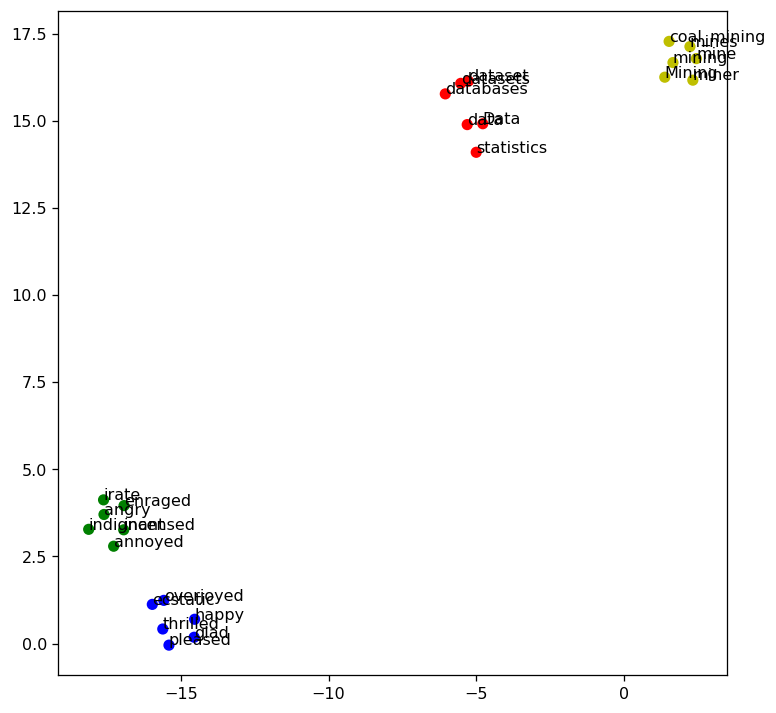

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

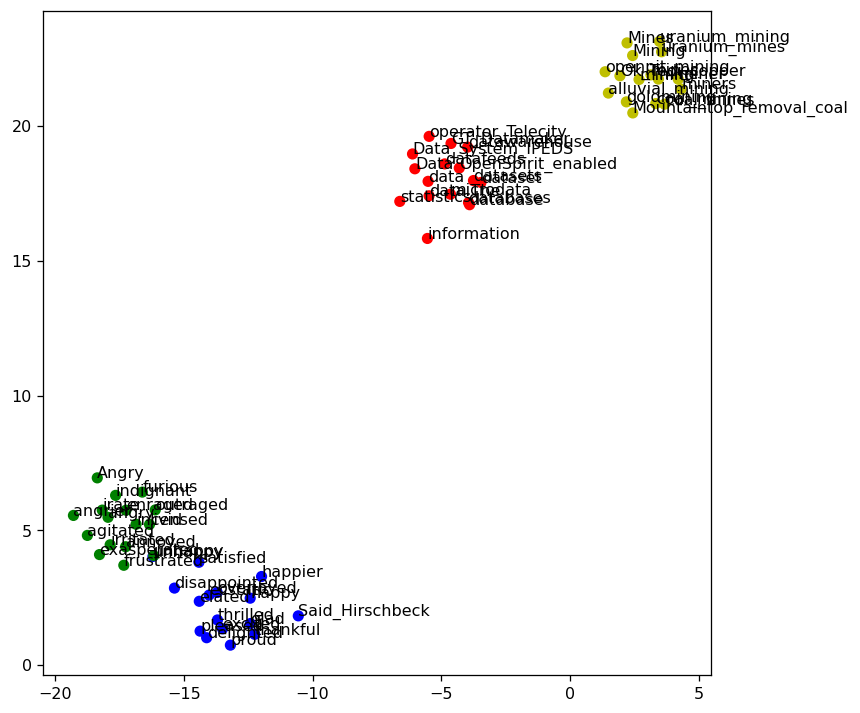

In [127]:
# Answer here

## w2v model
# model = w2v_google_model
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=42)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---